# sklearn

## logistic regression

逻辑回归实际上解决的是二分类问题，可以给出分类为0和1的概率，并设置阈值进行分类。阈值通常为0.5，因为sigmoid函数在附近变化幅度大，所以可以认为阈值越接近0.5，分类效果越好。

sigmoid函数：

$$
y(z) = \frac{1}{1 + e^{-z}}
$$

读取MNIST数据集，已下载，从[dataset](./dataset/mnist_784.arff)读取

In [3]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist["data"], mnist["target"]
import scipy.io.arff as arff
import os
import pandas as pd
import numpy as np

data, meta = arff.loadarff(os.path.join(os.getcwd(),
                                   'dataset', 'mnist_784.arff'))
mnist = pd.DataFrame(data)
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'2'
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'3'
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'


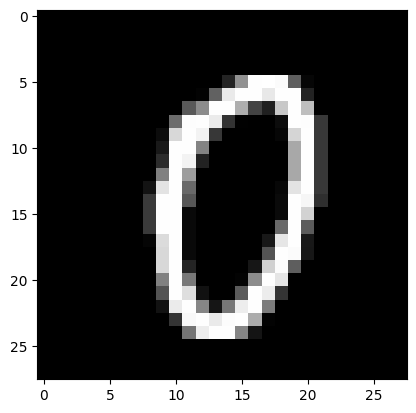

In [4]:
from matplotlib import pyplot as plt

image_show = mnist.iloc[1000, :-1].values.astype(float).reshape(28, 28)
plt.imshow(image_show, cmap='gray')

数据预处理，把数据打散

In [5]:
np.random.seed(42)
mnist_values = mnist.values
np.random.shuffle(mnist_values)

X_train = mnist_values[:60000, :-1].astype(float)
y_train = mnist_values[:60000, -1].astype(int)
X_test = mnist_values[60000:, :-1].astype(float)
y_test = mnist_values[60000:, -1].astype(int)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

用X_train, y_train进行训练，并用X_test进行测试，这是一个多分类问题，用logistic regression的nbinary classifier进行分类，用OvR(One-vs-Rest)的方法，即对每一个类别都训练一个二分类模型。

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


clf = OneVsRestClassifier(LogisticRegression(penalty='l2', solver='lbfgs',
                        max_iter=3000, n_jobs=-1, tol=1e-2))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 6, ..., 1, 0, 0])

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)

Precision: 0.9157837256400538
Recall: 0.9157
F1 Score: 0.9156101362807564
Confusion Matrix:
[[ 921    0    6    3    0    7    7    1   12    2]
 [   1 1114   11    5    2    1    1    4   16    6]
 [  10   14  914   21    9    5    7   12   35    3]
 [   5    0   22  882    1   26    7    7   22   12]
 [   2    7    5    4  905    1    7    3    9   29]
 [   9    3    7   40   13  778   23    4   21   14]
 [   6    3    8    0    4    8  958    0   12    0]
 [   3    5    9    1   11    2    1  968    3   37]
 [  10   16   13   20    2   23    6    7  878   16]
 [   5    2    6   19   25    7    1   33   15  839]]


## multinomial logistic regression

这是针对多分类问题的一种变体

we assume that there are K classes, and that the probability of the ith data point belonging to the jth class is given by:

$$\Pr(Y_i=k)=\frac1Ze^{\boldsymbol{\beta}_k\cdot\mathbf{X}_i}\quad,\quad k\leq K.$$

Z is a normalization constant

$$Z=\sum_{k=1}^{K}e^{{\boldsymbol{\beta}_{k}\cdot\mathbf{X}_{i}}}$$

loss function:

$$\begin{aligned}&L=\prod_{i=1}^nP(Y_i=y_i)=\prod_{i=1}^n\left(\prod_{j=1}^KP(Y_i=j)^{\delta_{j,y_i}}\right)\end{aligned}$$

$$\left.\delta_{j,y_i}=\left\{\begin{array}{l}1\text{ for }j=y_i\\0\text{ otherwise}\end{array}\right.\right.$$

to minimize the loss function:

$$-\log L=-\sum_{i=1}^n\sum_{j=1}^K\delta_{j,y_i}\log(P(Y_i=j)).$$

the resulting probability of given result is:

$$\Pr(Y_i=k)=\frac{e^{\beta_k\cdot\mathbf{X}_i}}{\sum_{j=1}^Ke^{\beta_j\cdot\mathbf{X}_i}}\quad,\quad k\leq K.$$

it can be written as:

$$\Pr(Y_i=c)=\mathrm{softmax}(c,\boldsymbol{\beta}_1\cdot\mathbf{X}_i,\ldots,\boldsymbol{\beta}_K\cdot\mathbf{X}_i)$$

$softmax$ denotes the max probability.

In [6]:
from sklearn.linear_model import LogisticRegression


clf_multi = LogisticRegression(random_state=0, solver='lbfgs', 
                               multi_class='multinomial', max_iter=3000)
clf_multi.fit(X_train, y_train)
y_pred_multi = clf_multi.predict(X_test)                            

/home/zqy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/zqy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


计算precission, recall, f1-score

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

precission_multi = precision_score(y_test, y_pred_multi, average='weighted')
recall_multi = recall_score(y_test, y_pred_multi, average='weighted')
f1_multi = f1_score(y_test, y_pred_multi, average='weighted')
print(f"Precision: {precission_multi}")
print(f"Recall: {recall_multi}")
print(f"F1-score: {f1_multi}")

Precision: 0.9148720856372915
Recall: 0.9149
F1-score: 0.9148082207679193
